In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

In [2]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS
import nltk
from konlpy.tag import Twitter
t = Twitter()

In [5]:
# 네이버 웹툰 리뷰가 저장된 파일 전체를 한번에 읽는다.
review = open('./review.txt', encoding='utf-8').read()
review

'비상금 주식 때려넣고 맘고생하기\n맘고생하면,,, 스트레스로 빠지긴 빠짐ㅋ\n남편이랑 3개월 끊어놓고 한번도 안감ㅋㅋㅋㅋㅋㅋ\n술끊고, 야식 끊고, 라면 끊고 간식 끊고 밥 반공기로 줄이고 삼시 세끼 꼬박꼬박 챙겨먹으면서 2년동안 앞자리수 두 번 바꿨는데요. 지금은 술도 가끔 마시고 먹고 싶은 거도 먹고 삼시 세끼 꼬박 챙겨먹는 건 아니지만 유지하려고 노력중입니당. 그래도 야식 안 먹어용, 평생하는 거라 생각하시는 게 젤 좋아여...또르르내일부터 하자고 생각하면 망하는 지름길임다ㅠㅠ \nㅋㅋㅋ\n튀김에 있는 탄수화물은요...?\n적당히 해요 ㅋㅋㅋㅋㅋㅋㅋ\n킹장갓시경\n현실: 1컷\n???: 물만 먹었는데....(무엇을 물처럼 먹어 치웠는지 생각해 보시오.)\n나쁜놈이네,,, 신랑이 저렇게 빼면 신부가 묻힌다규ㅠㅠㅠ\n살어떻게 빼요? 청첩장 나눠주면서 술먹으면 찌던데ㅜ \n너 C야 T발?\n냥군 진짜 대단한 사람이네요 의지도 대단하고..\n운동 안해도 3키로 저절로 빠지던데ㅋㅋ\n맞아요 다이어트 성공한 사람들은 대단한 것 같네요👍\nㅋㅋㅋㅋㅋ 표정 무엇?🤣\n우선 그 과자부터 내려놓고 말하시죠?ㅋㅋㅋㅋ 🤣\n냥군....멸치가 다 됐어....🤣ㅋㅋㅋ\n표정 너무 웃긴거 아니냐고🤣\n엄마:앗싸!~~\n저는 예식당일 너무나도 부지런한 엄빠덕분에 식장에 일직도착해서 1층애 있던 햄버거집에서 햄버거 세트 야무지게 먹고 결혼식을 치뤘?는데 그날 .. 임신해서 결혼했냐는 후문을 참 많이 들었지요.. 그나마 햄버거막었단 핑계가 있어서 다행 원래도 복부비만인디요 팔다리가 얇아 숨겨왔던 ㅋㅋㅋㅋ \n마루야 ..\n날잡고 결혼식날까지 6킬로가량 뺐어요 그럼뭐해 결혼하고 1년만에 도로 다 쪘는데....\n맞아 지금 재수중인데 6월에 시간의 촉박함을 느끼고 아점저먹는시간을 전부 공부시간으로 바꿨더니 이때 8월에는 15키로 빠져있었음 (두달 내내 굶은거 아님)(7월부턴 다시 잘 먹기 시작했는데 양이 줄어서 그럼)\n저도 이지은,신지니 다해봤지만 결국 덤벨들고 중량하는게 진짜 효과직빵

In [6]:
# 한글 형태소 분석을 실행한다.
review_tokens = t.nouns(review)
review_tokens

['비상',
 '금',
 '주식',
 '맘',
 '고생',
 '맘',
 '고생',
 '스트레스',
 '남편',
 '개월',
 '한번',
 '안감',
 '술',
 '야식',
 '라면',
 '간식',
 '밥',
 '공기',
 '줄',
 '삼시',
 '끼',
 '꼬박꼬박',
 '앞',
 '두',
 '번',
 '지금',
 '술',
 '가끔',
 '거도',
 '삼시',
 '끼',
 '꼬박',
 '건',
 '유지',
 '노력',
 '야식',
 '안',
 '평생',
 '거',
 '생각',
 '게',
 '젤',
 '또르르',
 '내일',
 '하자',
 '생각',
 '지름길',
 '튀김',
 '탄수화물',
 '요',
 '해',
 '킹',
 '시경',
 '현실',
 '컷',
 '물',
 '무엇',
 '물',
 '생각',
 '놈',
 '신랑',
 '신부',
 '규',
 '살',
 '빼',
 '청첩장',
 '술',
 '너',
 '발',
 '냥',
 '진짜',
 '사람',
 '요',
 '의지',
 '운동',
 '안해',
 '저절로',
 '다이어트',
 '사람',
 '것',
 '표정',
 '무엇',
 '우선',
 '그',
 '과자',
 '말',
 '냥',
 '멸치',
 '표정',
 '엄마',
 '앗',
 '저',
 '예식',
 '당일',
 '엄빠',
 '덕분',
 '식장',
 '직도',
 '층애',
 '햄버거',
 '집',
 '햄버거',
 '세트',
 '결혼식',
 '그날',
 '임신',
 '결혼',
 '후문',
 '햄버거',
 '핑계',
 '다행',
 '원래',
 '복부비만',
 '디',
 '팔다리',
 '마루',
 '날',
 '잡고',
 '결혼식',
 '날',
 '킬로',
 '가량',
 '뭐해',
 '결혼',
 '도로',
 '지금',
 '재수',
 '시간',
 '점저',
 '시간',
 '전부',
 '부시',
 '때',
 '달',
 '내내',
 '다시',
 '먹기',
 '시작',
 '양',
 '저',
 '이지은',
 '신지',
 '다해',
 '덤벨',
 '중량',
 '진짜',
 '효

In [11]:
# 불용어를 정의하고 제거한다.
stop_words = ['자까님', '정도', '본식', '다시', '우리', '때문']
review_tokens = [word for word in review_tokens if word not in stop_words]
# 단어가 1음절로 구성된 단어는 제거한다.
review_tokens = [word for word in review_tokens if len(word) > 1]
review_tokens

['비상',
 '주식',
 '고생',
 '고생',
 '스트레스',
 '남편',
 '개월',
 '한번',
 '안감',
 '야식',
 '라면',
 '간식',
 '공기',
 '삼시',
 '꼬박꼬박',
 '지금',
 '가끔',
 '거도',
 '삼시',
 '꼬박',
 '유지',
 '노력',
 '야식',
 '평생',
 '생각',
 '또르르',
 '내일',
 '하자',
 '생각',
 '지름길',
 '튀김',
 '탄수화물',
 '시경',
 '현실',
 '무엇',
 '생각',
 '신랑',
 '신부',
 '청첩장',
 '진짜',
 '사람',
 '의지',
 '운동',
 '안해',
 '저절로',
 '다이어트',
 '사람',
 '표정',
 '무엇',
 '우선',
 '과자',
 '멸치',
 '표정',
 '엄마',
 '예식',
 '당일',
 '엄빠',
 '덕분',
 '식장',
 '직도',
 '층애',
 '햄버거',
 '햄버거',
 '세트',
 '결혼식',
 '그날',
 '임신',
 '결혼',
 '후문',
 '햄버거',
 '핑계',
 '다행',
 '원래',
 '복부비만',
 '팔다리',
 '마루',
 '잡고',
 '결혼식',
 '킬로',
 '가량',
 '뭐해',
 '결혼',
 '도로',
 '지금',
 '재수',
 '시간',
 '점저',
 '시간',
 '전부',
 '부시',
 '내내',
 '먹기',
 '시작',
 '이지은',
 '신지',
 '다해',
 '덤벨',
 '중량',
 '진짜',
 '효과',
 '직빵',
 '투뿔',
 '저희',
 '아버지',
 '지긍',
 '다이어트',
 '체중',
 '샹크스',
 '다이어트',
 '법팔',
 '몸무게',
 '플로지스톤',
 '다이어트',
 '시구',
 '최고',
 '몸무게',
 '지금',
 '쭈그렁',
 '이제',
 '고정',
 '프사',
 '여기',
 '시험',
 '표정',
 '요요',
 '치킨',
 '밀가루',
 '결혼',
 '개월',
 '운동',
 '손실',
 '요요',
 '요요',
 '요지경',
 '세상',
 '지방',
 '분해',
 '주사

In [13]:
# 워드 클라우드로 구현할 단어들의 출현 빈도수를 센다.
token = nltk.Text(review_tokens)
token.vocab().most_common(250)

[('다이어트', 186),
 ('운동', 152),
 ('진짜', 91),
 ('사람', 82),
 ('결혼', 67),
 ('결혼식', 60),
 ('생각', 56),
 ('팔뚝', 55),
 ('지금', 49),
 ('지방', 47),
 ('살이', 46),
 ('드레스', 46),
 ('유지', 44),
 ('몸무게', 44),
 ('치킨', 41),
 ('개월', 38),
 ('제로', 35),
 ('체중', 33),
 ('하루', 32),
 ('그냥', 30),
 ('식단', 29),
 ('내시경', 27),
 ('사진', 27),
 ('탄수화물', 26),
 ('가슴', 26),
 ('근육', 26),
 ('방법', 25),
 ('신부', 24),
 ('헬스장', 24),
 ('대장', 24),
 ('최고', 23),
 ('감량', 23),
 ('한번', 22),
 ('정말', 22),
 ('요요', 21),
 ('남편', 20),
 ('저녁', 20),
 ('음식', 20),
 ('작가', 20),
 ('시작', 19),
 ('이제', 19),
 ('산소', 19),
 ('동안', 19),
 ('제일', 19),
 ('콜라', 19),
 ('단백질', 19),
 ('포토샵', 19),
 ('모습', 18),
 ('처음', 18),
 ('하나', 18),
 ('시간', 17),
 ('해도', 17),
 ('조금', 17),
 ('다음', 17),
 ('라면', 16),
 ('여러분', 16),
 ('인생', 16),
 ('보고', 16),
 ('최종', 16),
 ('스트레스', 15),
 ('맥주', 15),
 ('원래', 14),
 ('습관', 14),
 ('그게', 14),
 ('준비', 14),
 ('고생', 13),
 ('야식', 13),
 ('간식', 13),
 ('매일', 13),
 ('키로', 13),
 ('아침', 13),
 ('건강', 13),
 ('칼로리', 13),
 ('이건', 12),
 ('추천', 12),
 ('느낌', 

In [14]:
# 워드 클라우드로 구현할 단어를 뽑아내서 단어를 key로 하고 출현 빈도수를 value로 하는 딕셔너리를 만든다.
data = dict(token.vocab().most_common(250))
data

{'다이어트': 186,
 '운동': 152,
 '진짜': 91,
 '사람': 82,
 '결혼': 67,
 '결혼식': 60,
 '생각': 56,
 '팔뚝': 55,
 '지금': 49,
 '지방': 47,
 '살이': 46,
 '드레스': 46,
 '유지': 44,
 '몸무게': 44,
 '치킨': 41,
 '개월': 38,
 '제로': 35,
 '체중': 33,
 '하루': 32,
 '그냥': 30,
 '식단': 29,
 '내시경': 27,
 '사진': 27,
 '탄수화물': 26,
 '가슴': 26,
 '근육': 26,
 '방법': 25,
 '신부': 24,
 '헬스장': 24,
 '대장': 24,
 '최고': 23,
 '감량': 23,
 '한번': 22,
 '정말': 22,
 '요요': 21,
 '남편': 20,
 '저녁': 20,
 '음식': 20,
 '작가': 20,
 '시작': 19,
 '이제': 19,
 '산소': 19,
 '동안': 19,
 '제일': 19,
 '콜라': 19,
 '단백질': 19,
 '포토샵': 19,
 '모습': 18,
 '처음': 18,
 '하나': 18,
 '시간': 17,
 '해도': 17,
 '조금': 17,
 '다음': 17,
 '라면': 16,
 '여러분': 16,
 '인생': 16,
 '보고': 16,
 '최종': 16,
 '스트레스': 15,
 '맥주': 15,
 '원래': 14,
 '습관': 14,
 '그게': 14,
 '준비': 14,
 '고생': 13,
 '야식': 13,
 '간식': 13,
 '매일': 13,
 '키로': 13,
 '아침': 13,
 '건강': 13,
 '칼로리': 13,
 '이건': 12,
 '추천': 12,
 '느낌': 12,
 '대신': 12,
 '일기': 12,
 '성공': 12,
 '가장': 12,
 '계속': 12,
 '그거': 12,
 '포샵': 12,
 '무조건': 12,
 '튀김': 11,
 '의지': 11,
 '세상': 11,
 '일주일': 11,
 '탄산': 11,
 '

In [16]:
# 워드 클라우드 마스크 이미지
mask = np.array(Image.open('./mask.png'))

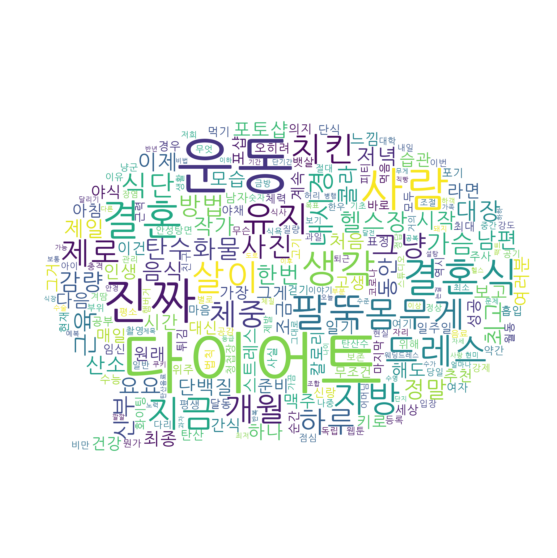

In [20]:
# 딕셔너리에 저장된 데이터를 generate_from_frequencies() 메소드를 사용해서 워드 클라우드를 만든다.
wordcloud = WordCloud(
    font_path='C:\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    max_font_size=250,
    max_words=250,
    mask=mask
).generate_from_frequencies(data)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()